In [2]:
from astropy.io import fits
import numpy as np
import astropy.wcs as wcs
from spectral_cube import SpectralCube

In [59]:
mfs_hdu = fits.open("1274010302_spec-MFS-dirty.fits")
im_shape = mfs_hdu[0].data[0][0].shape
im_wcs = wcs.WCS(mfs_hdu[0].header)
print(im_wcs.printwcs())
print(im_wcs.wcs.ctype[1])

WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN' 'DEC--SIN' 'FREQ' 'STOKES' 
CRVAL : 135.0 0.5 215675000.0 1.0 
CRPIX : 129.0 129.0 1.0 1.0 
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0 0.0 0.0 0.0 
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0 1.0 0.0 0.0 
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0 0.0 1.0 0.0 
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0 0.0 0.0 1.0 
CDELT : -0.0035502 0.0035502 30720000.0 1.0 
NAXIS : 256  256  1  1
None
DEC--SIN


In [ ]:
# TODO: Use image WCS to create vals for cube WCS
mfs_hdu = fits.open("1274010302_spec-MFS-dirty.fits")
im_shape = mfs_hdu[0].data[0][0].shape
im_wcs = wcs.WCS(mfs_hdu[0].header)

w = wcs.WCS(naxis=3)
wcs_dict = {
    'CTYPE1': 'RA---SIN',
    'CUNIT1': 'deg',
    "CDELT1": -0.0035502,
    "NAXIS1": 256,
    "CRPIX1": 129,
    "CRVAL1": 135.0,
    'CTYPE2': 'DEC--SIN',
    'CUNIT2': 'deg',
    "CDELT2": 0.0035502,
    "NAXIS2": 256,
    "CRPIX2": 129,
    "CRVAL2": 0.5,
    'CTYPE3': 'FREQ',
    'CUNIT3': 'Hz',
    "CDELT3": 10000,
    "NAXIS3": 3072,
    "CRPIX3": 1,
    "CRVAL3": 200320000.0,
}
input_wcs = wcs.WCS(wcs_dict)
print(input_wcs.printwcs())

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN' 'DEC--SIN' 'FREQ' 
CRVAL : 135.0 0.5 200320000.0 
CRPIX : 129.0 129.0 1.0 
PC1_1 PC1_2 PC1_3  : 1.0 0.0 0.0 
PC2_1 PC2_2 PC2_3  : 0.0 1.0 0.0 
PC3_1 PC3_2 PC3_3  : 0.0 0.0 1.0 
CDELT : -0.0035502 0.0035502 10000.0 
NAXIS : 256  256  3072
None


In [ ]:
mfs_hdu = fits.open("1274010302_spec-0000-dirty.fits")
im_shape = mfs_hdu[0].data[0][0].shape
im_cube = np.zeros((3072, im_shape[0], im_shape[1]))
wcs_cube = []
mfs_hdu.close()

for i in range(im_cube.shape[0] - 1):
    hdu = fits.open(f"1274010302_spec-{i:04d}-dirty.fits")
    imdata = hdu[0].data[0][0]
    im_wcs = hdu[0].header
    im_cube[i, :, :] = imdata
    wcs_cube.append(im_wcs)
    hdu.close()

hdu_out = fits.PrimaryHDU(data=im_cube,header=input_wcs.to_header())
hdu_out.writeto("1274010302_spec-dirty-cube.fits", overwrite=True)


In [12]:
cube_data = fits.open("1274010302_spec-dirty-cube.fits")
cube = SpectralCube.read(cube_data)
cube_data.close()

In [13]:
print(cube)

SpectralCube with shape=(3072, 256, 256):
 n_x:    256  type_x: RA---SIN  unit_x: deg    range:   134.549058 deg:  135.454493 deg
 n_y:    256  type_y: DEC--SIN  unit_y: deg    range:     0.045554 deg:    0.950865 deg
 n_s:   3072  type_s: FREQ      unit_s: Hz     range: 200320000.000 Hz:231030000.000 Hz


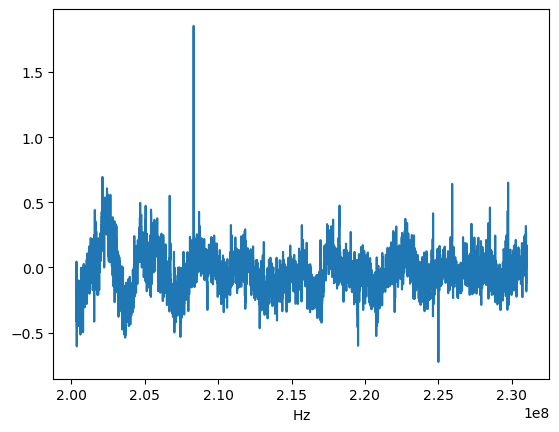

In [18]:
# TODO: use wcs to determine pixel value of chosen target rather than random 
cube[:, 125, 125].quicklook()

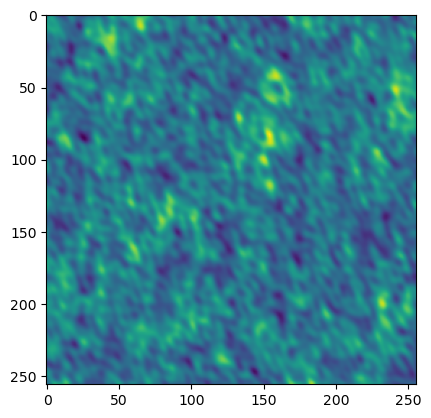

In [19]:
cube[1500, :, :].quicklook()